In [1]:
from MPU6050 import MPU6050

accel = MPU6050(time_step=1, duration=1500, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)


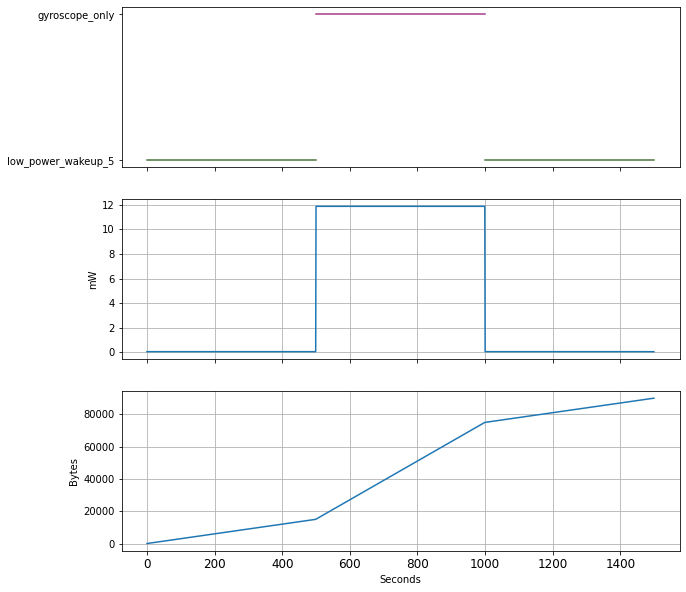

1

In [2]:
active_times = [(0,500,"low_power_wakeup_5"), (500,1000,"gyroscope_only"), (1000,1500,"low_power_wakeup_5")]
accel.runSim(active_times)

[(0, 15, 'gyroscope_accelerometer_DMP'), (15, 30, 'accelerometer_only'), (30, 70, 'low_power_wakeup_5'), (70, 85, 'gyroscope_accelerometer_DMP'), (85, 100, 'accelerometer_only'), (100, 140, 'low_power_wakeup_5'), (140, 155, 'gyroscope_accelerometer_DMP'), (155, 170, 'accelerometer_only'), (170, 210, 'low_power_wakeup_5'), (210, 225, 'gyroscope_accelerometer_DMP'), (225, 240, 'accelerometer_only'), (240, 280, 'low_power_wakeup_5'), (280, 295, 'gyroscope_accelerometer_DMP'), (295, 310, 'accelerometer_only'), (310, 350, 'low_power_wakeup_5'), (350, 365, 'gyroscope_accelerometer_DMP'), (365, 380, 'accelerometer_only'), (380, 420, 'low_power_wakeup_5'), (420, 435, 'gyroscope_accelerometer_DMP'), (435, 450, 'accelerometer_only'), (450, 490, 'low_power_wakeup_5'), (490, 505, 'gyroscope_accelerometer_DMP'), (505, 520, 'accelerometer_only'), (520, 560, 'low_power_wakeup_5'), (560, 575, 'gyroscope_accelerometer_DMP'), (575, 590, 'accelerometer_only'), (590, 630, 'low_power_wakeup_5'), (630, 645,

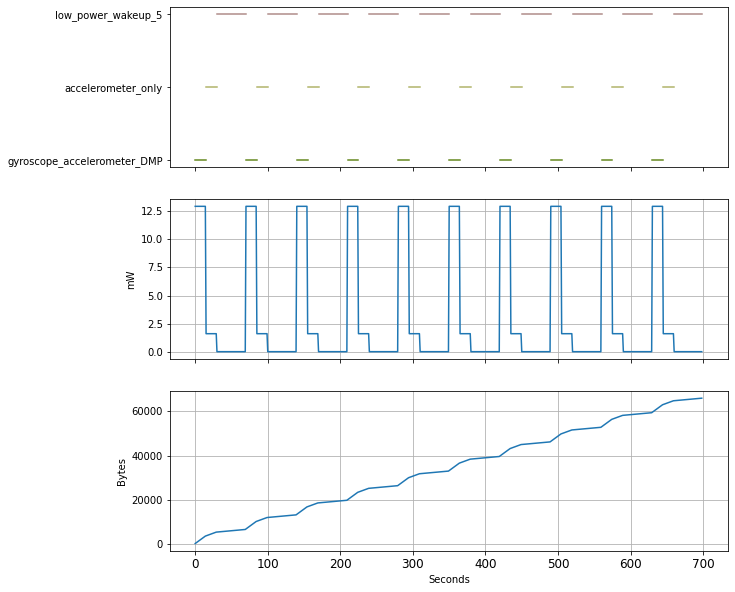

1

In [63]:
def generateActiveList(total_time: float, modedict:dict, **kwargs) -> list:
    #frequency should be in hz. duration should be in seconds
    finalArr = []
    curTime = 0
    flag = False
    while curTime < total_time:
        for key in modedict:
            if curTime+modedict[key]>total_time:
                flag = True
                break
            finalArr.append((curTime, curTime+modedict[key], key))
            curTime += modedict[key]
        if flag: 
            break
    mode = len(finalArr) % len(modedict)
    if finalArr[-1][1] > total_time:
        finalArr[-1] = (finalArr[-1][0], total_time, list(modedict.keys())[mode])
    elif finalArr[-1][1] < total_time:
        finalArr.append((finalArr[-1][1], total_time, list(modedict.keys())[mode]))
    print(finalArr)
    return finalArr

modedict = {"gyroscope_accelerometer_DMP":15, "accelerometer_only":15,"low_power_wakeup_5":40}
active_times = generateActiveList(total_time=699, modedict=modedict)
accel2 = MPU6050(time_step=1, duration=699, loop_rate=20, digital_low_pass=0, sample_rate_divisor=0)

accel2.runSim(active_times)


